In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

data.shape

(3150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [10]:
data.sample(5)

,rating,date,variation,verified_reviews,feedback
2039,3,16-Jul-18,White Plus,"""Alexa is a decent speaker if that's all you n...",1
633,5,29-May-18,Black,It’s amazing I love it,1
1994,5,21-Jul-18,Black Plus,I have an original Echo and really like it. I ...,1
1358,5,19-Jul-18,White Spot,I’m leaving this for those who don’t have enou...,1
2954,5,30-Jul-18,White Dot,I really like the echo dot. It’s amazing to be...,1


In [8]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [10]:
# adding a new column to the dataset which determines the length of the reviews

data['length'] = data['verified_reviews'].apply(len)

data.shape

(3150, 6)

In [11]:
# describing the ratings of the product.

data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [12]:
# describing the feedback of the product

data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

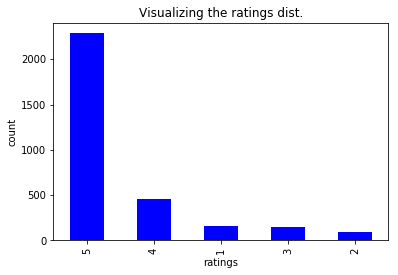

In [14]:
# plotting the different rating given by the users using bar plot

data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Visualizing the ratings dist.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

In [15]:
# counting the different ratings given to the product by the users

data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

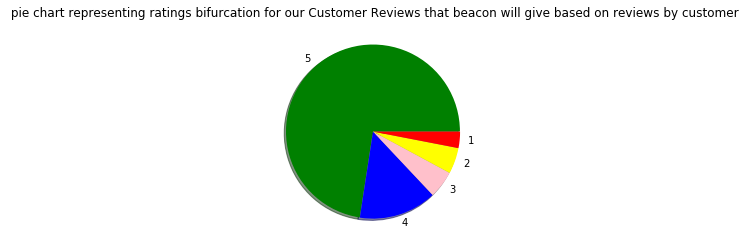

In [27]:
# plotting a pie chart to represent the different share of different ratings

labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['green', 'blue', 'pink', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title(' pie chart representing ratings bifurcation for our Customer Reviews that beacon will give based on reviews by customer')
plt.show()

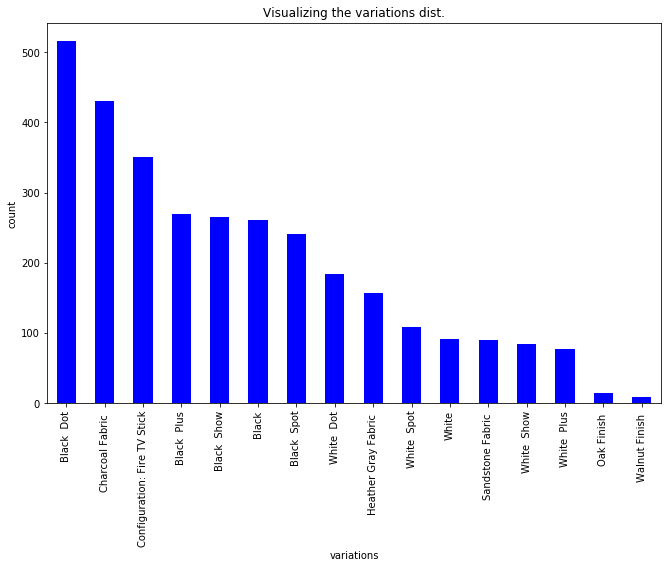

In [22]:
# plotting the variations 

data['variation'].value_counts().plot.bar(color = 'blue', figsize = (11, 7))
plt.title('Visualizing the variations dist.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

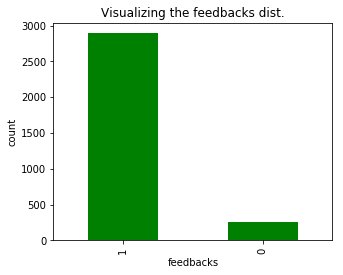

In [24]:
# plotting the feedback according to it's count

data['feedback'].value_counts().plot.bar(color = 'green', figsize = (5, 4))
plt.title('Visualizing the feedbacks dist.')
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()

In [25]:
data.date.describe()


count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [26]:
data['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
25-Jul-18      43
19-Jul-18      38
27-Jul-18      38
20-Jul-18      28
21-Jul-18      26
24-Jul-18      25
22-Jul-18      21
23-Jul-18      21
18-Jul-18      21
16-Jul-18      17
17-Jul-18      16
2-Jul-18       14
21-Jun-18      12
9-Jul-18       11
5-Jul-18       11
11-Jun-18      10
31-May-18      10
15-Jul-18      10
27-May-18      10
7-Jul-18        9
10-Jun-18       9
3-Jul-18        8
5-Jun-18        8
13-Jul-18       8
12-Jun-18       8
             ... 
25-May-18       5
23-May-18       5
7-Jun-18        5
6-Jul-18        5
19-May-18       5
24-May-18       5
16-May-18       5
20-May-18       5
30-Jun-18       5
8-Jun-18        4
17-Jun-18       4
28-Jun-18       4
16-Jun-18       4
12-Jul-18       4
26-May-18       4
8-Jul-18        4
19-Jun-18       3
18-May-18       3
18-Jun-18       3
15-Jun-18       3
23-Jun-18       3
22-Jun-18       3
22-May-18       3
1-Jun-18        2
21-May-18 

In [28]:
# describing the length of the reviews

data.length.describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [29]:
#printing the reviews with minimum length
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [30]:
data[data['length'] == 2853]['verified_reviews'].iloc[0]

'"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It\'s no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free P

In [11]:
data.date.describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [12]:
data['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
25-Jul-18      43
19-Jul-18      38
27-Jul-18      38
20-Jul-18      28
21-Jul-18      26
24-Jul-18      25
23-Jul-18      21
18-Jul-18      21
22-Jul-18      21
16-Jul-18      17
17-Jul-18      16
2-Jul-18       14
21-Jun-18      12
9-Jul-18       11
5-Jul-18       11
15-Jul-18      10
11-Jun-18      10
31-May-18      10
27-May-18      10
10-Jun-18       9
7-Jul-18        9
10-Jul-18       8
1-Jul-18        8
27-Jun-18       8
3-Jul-18        8
             ... 
30-May-18       5
25-May-18       5
23-May-18       5
24-May-18       5
20-May-18       5
19-May-18       5
6-Jul-18        5
30-Jun-18       5
14-Jul-18       5
8-Jun-18        4
16-Jun-18       4
17-Jun-18       4
8-Jul-18        4
12-Jul-18       4
28-Jun-18       4
26-May-18       4
23-Jun-18       3
22-Jun-18       3
18-May-18       3
18-Jun-18       3
19-Jun-18       3
15-Jun-18       3
22-May-18       3
2-Jun-18        2
1-Jun-18  

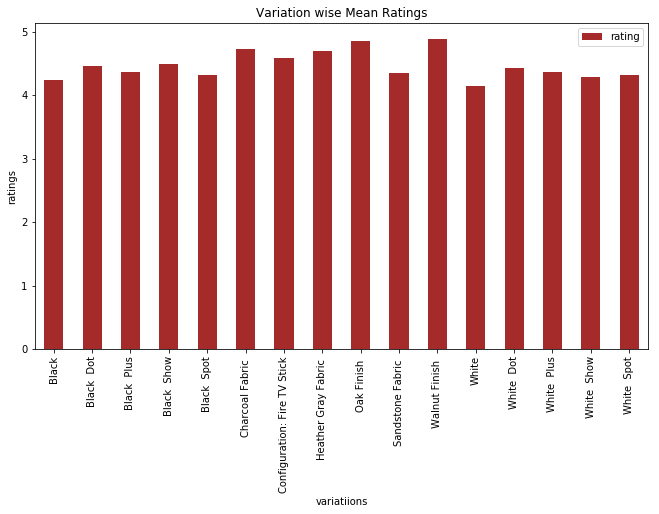

In [13]:
data.groupby('variation').mean()[['rating']].plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Variation wise Mean Ratings")
plt.xlabel('variatiions')
plt.ylabel('ratings')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

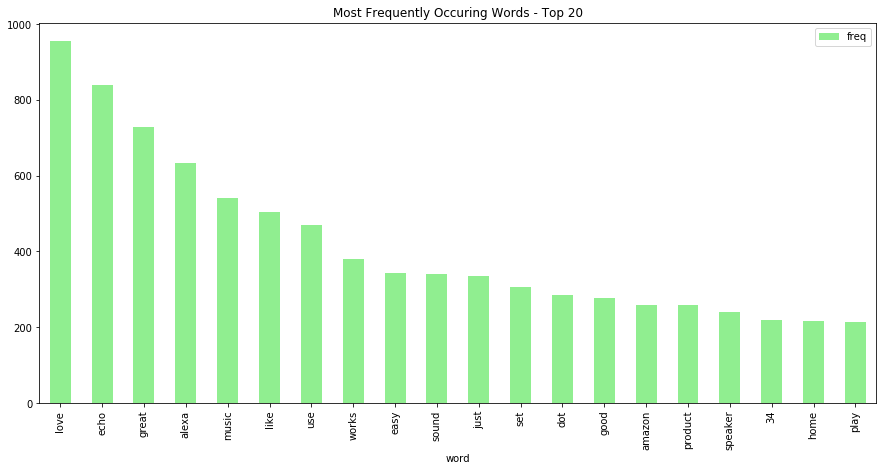

In [14]:
# making a count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

# counting the words frequency
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# plotting the highly frequent words from the dataset
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'lightgreen')
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

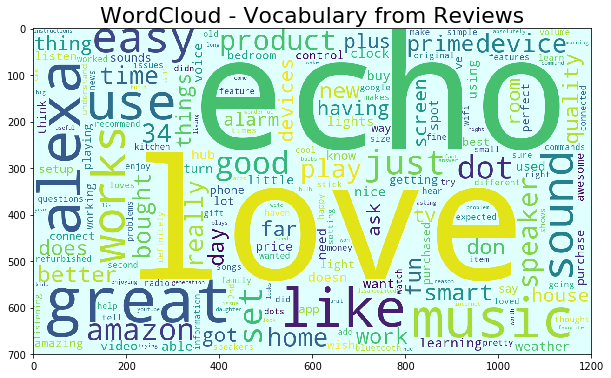

In [18]:
# making a words cloud
# a word cloud is a visual representation of most occuring words represented by larger and bolder fonts compared to the 
# words having a lesser frequency rate.

# install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)